In [1]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
from tensorflow.keras.preprocessing import image

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train[:20]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

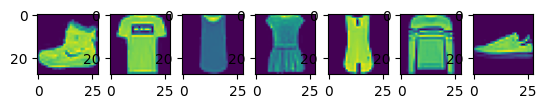

In [5]:
for i in range(7):
    plt.subplot(4,7,i+1)
    plt.imshow(x_train[i])
plt.show()

In [6]:
input_shape = (28, 28, 1)

In [7]:
model_1 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      # Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      # MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(50,activation = 'relu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [8]:
model_1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [9]:
x_train = x_train / 255
x_test = x_test / 255
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [10]:
%%time

history = model_1.fit(x_train, y_train_cat, batch_size=32, epochs=5,validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 24s 12ms/step - loss: 0.4048 - accuracy: 0.8565 - val_loss: 0.3191 - val_accuracy: 0.8880
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2784 - accuracy: 0.8993 - val_loss: 0.2887 - val_accuracy: 0.8944
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2381 - accuracy: 0.9124 - val_loss: 0.2672 - val_accuracy: 0.9018
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2086 - accuracy: 0.9227 - val_loss: 0.2702 - val_accuracy: 0.9039
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1859 - accuracy: 0.9311 - val_loss: 0.2551 - val_accuracy: 0.9104
CPU times: total: 2min 52s
Wall time: 1min 54s


In [11]:
model_2 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50, activation = 'relu'),
      Dense(10, activation = 'softmax')
      ] )

In [12]:
model_2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5,validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5313 - accuracy: 0.8176 - val_loss: 0.4428 - val_accuracy: 0.8430
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4009 - accuracy: 0.8570 - val_loss: 0.4183 - val_accuracy: 0.8510
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3626 - accuracy: 0.8691 - val_loss: 0.4041 - val_accuracy: 0.8607
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3424 - accuracy: 0.8763 - val_loss: 0.3798 - val_accuracy: 0.8643
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3238 - accuracy: 0.8830 - val_loss: 0.3736 - val_accuracy: 0.8686
CPU times: total: 11.3 s
Wall time: 18.8 s


In [14]:
model_3 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(50,activation = 'relu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [15]:
model_3.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
%%time

history = model_3.fit(x_train, y_train_cat, batch_size=32, epochs=5,validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.4350 - accuracy: 0.8433 - val_loss: 0.3363 - val_accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2889 - accuracy: 0.8964 - val_loss: 0.3039 - val_accuracy: 0.8906
Epoch 3/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2449 - accuracy: 0.9109 - val_loss: 0.2657 - val_accuracy: 0.9033
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2150 - accuracy: 0.9210 - val_loss: 0.2614 - val_accuracy: 0.9056
Epoch 5/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1905 - accuracy: 0.9297 - val_loss: 0.2558 - val_accuracy: 0.9066
CPU times: total: 6min 9s
Wall time: 3min 44s


In [17]:
model_4 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(128, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(128,activation = 'relu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [18]:
model_4.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [19]:
%%time

history = model_4.fit(x_train, y_train_cat, batch_size=32, epochs=10,validation_data =(x_test, y_test_cat) )


Epoch 1/10
1875/1875 [==============================] - 55s 28ms/step - loss: 0.4338 - accuracy: 0.8419 - val_loss: 0.3290 - val_accuracy: 0.8829
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2745 - accuracy: 0.8994 - val_loss: 0.2765 - val_accuracy: 0.8994
Epoch 3/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2277 - accuracy: 0.9165 - val_loss: 0.2445 - val_accuracy: 0.9103
Epoch 4/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1962 - accuracy: 0.9272 - val_loss: 0.2386 - val_accuracy: 0.9116
Epoch 5/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1698 - accuracy: 0.9376 - val_loss: 0.2347 - val_accuracy: 0.9170
Epoch 6/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1476 - accuracy: 0.9455 - val_loss: 0.2493 - val_accuracy: 0.9147
Epoch 7/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1283 - accuracy: 0.9515 - val_loss: 0.2462 -

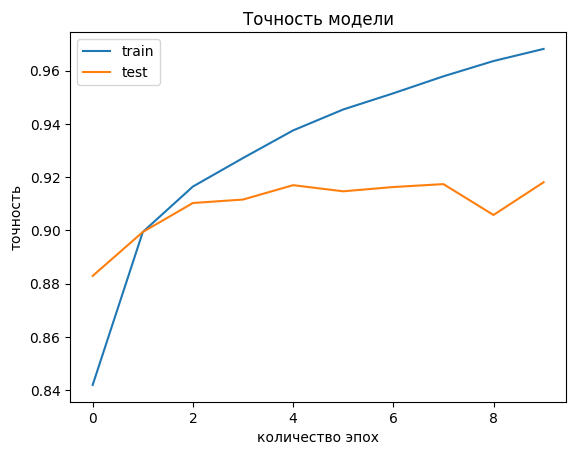

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

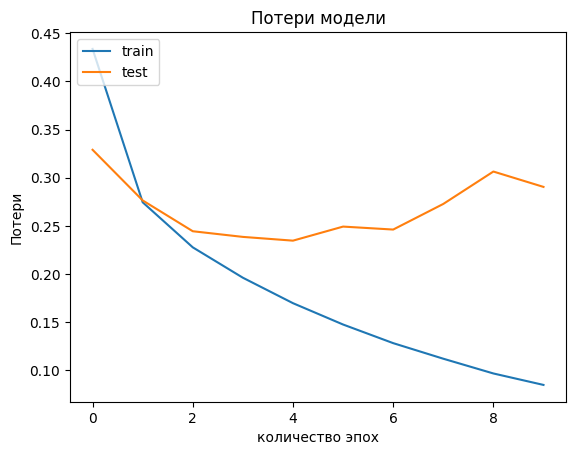

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 128)       

In [23]:
keras.utils.plot_model(model_4)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Применение BatchNormalization

In [24]:
model_5 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      BatchNormalization(),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      BatchNormalization(),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(50,activation = 'relu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [25]:
model_5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model_5.fit(x_train, y_train_cat, batch_size=32, epochs=15,
                    validation_data =(x_test, y_test_cat) )

Epoch 1/15
1875/1875 [==============================] - 58s 30ms/step - loss: 0.3645 - accuracy: 0.8694 - val_loss: 0.3347 - val_accuracy: 0.8777
Epoch 2/15
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2486 - accuracy: 0.9072 - val_loss: 0.2713 - val_accuracy: 0.9019
Epoch 3/15
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2135 - accuracy: 0.9200 - val_loss: 0.2822 - val_accuracy: 0.9000
Epoch 4/15
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1853 - accuracy: 0.9314 - val_loss: 0.2562 - val_accuracy: 0.9136
Epoch 5/15
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1650 - accuracy: 0.9394 - val_loss: 0.2664 - val_accuracy: 0.9122
Epoch 6/15
1875/1875 [==============================] - 59s 32ms/step - loss: 0.1472 - accuracy: 0.9447 - val_loss: 0.3867 - val_accuracy: 0.8765
Epoch 7/15
1875/1875 [==============================] - 61s 33ms/step - loss: 0.1317 - accuracy: 0.9513 - val_loss: 0.3195 -

Использование циклического обучения скорости

In [26]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.2)

model_6 = keras.Sequential([
  keras.Input(shape=input_shape),
  Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
  MaxPooling2D( (2,2), strides = 2),
  Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
  MaxPooling2D( (2,2), strides = 2),
  GlobalAveragePooling2D(),
  Dense(50,activation = 'relu'),
  Dense(10, activation = 'softmax')
])

In [27]:
model_6.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model_6.fit(x_train, y_train_cat, batch_size=32, epochs=15,
                    validation_data =(x_test, y_test_cat), callbacks=[reduce_lr])

Epoch 1/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.9684 - accuracy: 0.6503 - val_loss: 0.7144 - val_accuracy: 0.7473 - lr: 0.0010
Epoch 2/15
1875/1875 [==============================] - 40s 21ms/step - loss: 0.6635 - accuracy: 0.7610 - val_loss: 0.6364 - val_accuracy: 0.7741 - lr: 0.0010
Epoch 3/15
1875/1875 [==============================] - 39s 21ms/step - loss: 0.5833 - accuracy: 0.7875 - val_loss: 0.5678 - val_accuracy: 0.7923 - lr: 0.0010
Epoch 4/15
1875/1875 [==============================] - 39s 21ms/step - loss: 0.5338 - accuracy: 0.8087 - val_loss: 0.5622 - val_accuracy: 0.7928 - lr: 0.0010
Epoch 5/15
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4972 - accuracy: 0.8222 - val_loss: 0.4860 - val_accuracy: 0.8268 - lr: 0.0010
Epoch 6/15
1875/1875 [==============================] - 41s 22ms/step - loss: 0.4659 - accuracy: 0.8322 - val_loss: 0.4734 - val_accuracy: 0.8325 - lr: 0.0010
Epoch 7/15
1875/1875 [========================

Использовать Dropout после каждого Dense слоя

In [28]:
model_7 = keras.Sequential([
  keras.Input(shape=input_shape),
  Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
  MaxPooling2D( (2,2), strides = 2),
  Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
  MaxPooling2D( (2,2), strides = 2),
  GlobalAveragePooling2D(),
  Dense(50,activation = 'relu'),
  Dropout(0.2),
  Dense(10, activation = 'softmax')
])

In [29]:
model_7.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model_7.fit(x_train, y_train_cat, batch_size=32, epochs=10,
                    validation_data =(x_test, y_test_cat), callbacks=[reduce_lr])

Epoch 1/10
1875/1875 [==============================] - 37s 20ms/step - loss: 1.0901 - accuracy: 0.5893 - val_loss: 0.7499 - val_accuracy: 0.7374 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.7496 - accuracy: 0.7292 - val_loss: 0.6604 - val_accuracy: 0.7618 - lr: 0.0010
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.6640 - accuracy: 0.7614 - val_loss: 0.5821 - val_accuracy: 0.7842 - lr: 0.0010
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.6032 - accuracy: 0.7826 - val_loss: 0.5352 - val_accuracy: 0.8021 - lr: 0.0010
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.5623 - accuracy: 0.7970 - val_loss: 0.5081 - val_accuracy: 0.8177 - lr: 0.0010
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.5247 - accuracy: 0.8117 - val_loss: 0.4708 - val_accuracy: 0.8307 - lr: 0.0010
Epoch 7/10
1875/1875 [========================

Вывод: 
Использование Dropout снизила точность модели, возросли потери

Замена Flatten на GlobalAveragePooling2D

In [35]:
model_8 = keras.Sequential([
  keras.Input(shape=input_shape),
  Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
  MaxPooling2D( (2,2), strides = 2),
  Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
  MaxPooling2D( (2,2), strides = 2),
  GlobalAveragePooling2D(),
  Dense(50,activation = 'relu'),
  Dense(10, activation = 'softmax')
])

In [37]:
model_8.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model_8.fit(x_train, y_train_cat, batch_size=32, epochs=15,
                    validation_data =(x_test, y_test_cat) )

Epoch 1/15
1875/1875 [==============================] - 45s 24ms/step - loss: 0.4945 - accuracy: 0.8222 - val_loss: 0.4834 - val_accuracy: 0.8282
Epoch 2/15
1875/1875 [==============================] - 41s 22ms/step - loss: 0.4578 - accuracy: 0.8362 - val_loss: 0.4618 - val_accuracy: 0.8410
Epoch 3/15
1875/1875 [==============================] - 43s 23ms/step - loss: 0.4275 - accuracy: 0.8481 - val_loss: 0.4234 - val_accuracy: 0.8550
Epoch 4/15
1875/1875 [==============================] - 41s 22ms/step - loss: 0.4088 - accuracy: 0.8551 - val_loss: 0.4168 - val_accuracy: 0.8529
Epoch 5/15
1875/1875 [==============================] - 40s 22ms/step - loss: 0.3878 - accuracy: 0.8617 - val_loss: 0.4024 - val_accuracy: 0.8579
Epoch 6/15
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3760 - accuracy: 0.8662 - val_loss: 0.3892 - val_accuracy: 0.8638
Epoch 7/15
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3644 - accuracy: 0.8698 - val_loss: 0.3862 -

Вывод:
Точность на тестовом наборе упала (примерно с 91% до 87-88%). Модель начала показывать признаки переобучения после 10 эпохи

In [38]:
import pandas as pd
models = [model_1, model_2, model_3, model_4, model_5, model_6, model_7, model_8 ]

results = []
for model in models:
  _, accuracy = model.evaluate(x_test, y_test_cat)
  results.append(accuracy)

df = pd.DataFrame({'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model_5', 'Model_6', 'Model_7', 'Model_8']})



313/313 [==============================] - 2s 7ms/step - loss: 0.3533 - accuracy: 0.8788


Выводы:
Model 4 - лучшая по точности. На тестовом наборе данных она демонстрирует самые высокие результаты(91,81%).
Model 1 (91.04%) и Model 5 (91.70%) следуют за ней с незначительным отставанием.
Model 2 - простейшая. Она достигает достаточно хорошей точности, будучи при этом простой, без сверточных слоев.
Остальные модели демонстрируют посредственные результаты. Model 8 с GlobalAveragePooling, Model 6 с циклической скоростью обучения и Model 7 с Dropout и BatchNormalization не показали значительных улучшений относительно базовой модели Model 1.